In [56]:
from bs4 import BeautifulSoup

from urllib.request import urlopen

In [31]:
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

# Approach 1

In [37]:
with open('index.html', encoding='utf-8') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

In [38]:
comments = soup.select('.jquerycomment-comment-body')

lis = []
for c in comments:
    lis.append(c.text.replace('\u200c',''))
    
lis = '\n'.join(lis)

In [39]:
text = arabic_reshaper.reshape(lis)
text = get_display(text)

### STOPWORDS

In [52]:
stopwords = {
    'و', 'سلام', 'با', 'در', 'چند', 'کی', 'چیزی', 'باشی', 'سه', 'میاری', 'بودم', 'بقیه'
    , 'دارم', 'رو', 'را', 'زیر', 'که', 'واقعا', 'میارم', 'خب', 'عزیز', 'شد', 'شاید', 'حدود'
    , 'به', 'من', 'تو', 'از', 'هم', 'کنیم', 'بوده', 'چقدر', 'نظرم', 'بگین', 'حتی', 'دقیقا'
    , 'خیلی', 'برای', 'ولی', 'بعد', 'توی', 'بگید', 'داشته', 'بنظرتون', 'بی', 'یک', 'صفحه'
    , 'اگه', 'این', 'میشه', 'یه', 'نیست', 'نظرتون', 'داری', 'بگید', 'وقتی', 'بد', 'دارن', 'بدین'
    , 'هست', 'بود', 'تا', 'دیگه', 'به', 'همه', 'هستم', 'شدم', 'چیه', 'بشم', 'کرده', 'بهم', 'میگن'
    , 'کردم', 'کن', 'اون', 'چرا', 'چون', 'هر', 'باشم', 'پیش', 'بشه', 'میتونم', 'هیچ', 'آره', 'بگم'
    , 'نه', 'میاد', 'کنید', 'یا', 'داره', 'منم', 'خوبی', 'ثبت', 'برام', 'اول', 'خود', 'بگه', 'کم', 'یعنی'
    , 'شما', 'باشه', 'الان', 'ممنون', 'میشم', 'بدید', 'نظر', 'دوستان', 'باشید', 'زدم', 'گفتم', 'ندارم', 'بالا', 'بودن', 'اینا'
    , 'کنم', 'نداره', 'بهتر', 'واسه', 'لطفا', 'سال', 'زیاد' , 'احتمالا', 'میکنه', 'برو', 'فک', 'همین', 'نمیدونم', 'کسی'
    , 'فقط', 'حتما', 'اینجا', 'اصلا', 'ک', 'چه', 'میکنم', 'سوال', 'بار', 'درصد', 'درست', 'رتبم', 'ام', ''
    , 'خوبه', 'است', 'خوب', 'چی', 'بچه‌ها', 'مبارک', 'بابا', 'مرسی', 'نمیشه', 'قبل', 'درسته', 'هیچ', 'همون', 'وقت'
    , 'باید', 'ب', 'برا', 'یکی', 'شده', 'ای', 'دو', 'کنی', 'ما', 'میخوام', 'پایین', 'رشته', 'رتبه', 'امسال'
    , 'بله', 'کنه', 'روز', 'بده', 'اگر', 'عزیزم', 'خودم', 'منطقه', 'قبول', 'پارسال', 'میتونی', 'جواب', 'دیدم', 'میگخ'
    , 'حالا', 'مثل', 'ی', 'کردن', 'اره', 'اما', 'خودت', 'اینو', 'حدودا', 'میشی', 'دیدم', 'دوست', 'زده', 'مثلا'
    , 'البته', 'پس', 'میگم', 'یکم', 'گفته', 'قطعا', 'امیدوارم', 'کلا', 'کرد', 'بچه', 'مگه', 'دل'
    , 'سنجش', 'نتایج', 'باشین', 'سایت', 'بیاد', 'بدتر', 'همیشه', 'نفر', 'میکنی', 'بین', 'گفت', 'دادم', 'درصدام'
    , 'بار', 'درصدای', 'کدوم', 'اینکه', 'کجا', 'داداش', 'وزنی', 'ممکنه', 'درصدا', 'درصدها', 'شدن', 'نکن', 'میگخ', 'بهش'
    , 'تموم', 'رفتم', 'کاربر', 'منو', 'اضافه', 'بیشتر', 'عیدتون', 'میدونه', 'گفتن', 'میده', 'اینه', 'میگه', 'باز', 'بهت'
    , 'خوش', 'آقای', 'خواهش', 'کاش', 'داشتم', 'نیاز', 'بخیر', 'زدن', 'یاد', 'کاری', 'ببین', 'باش', 'رتبه‌ها', 'بیارم'
    , 'کنین', 'باز', 'اونم', 'اف', 'میکنن', 'بچهها', 'راه', 'درصدهای', 'تراز', 'سطح', 'وای', 'حداقل', 'ببخشید', 'برم'
    , 'بدون', 'هفته', 'ماه', 'ها', 'بدم', 'نبود', 'هایی', 'خانم', 'آیا', 'زدی', 'چطور', '', '', ''
    , 'نیس', 'دادن', 'میخواد', 'بهتره', 'کامنت', 'ده', 'شروع', 'چیز', 'میخواد', '', '', '', '', ''
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
}

In [60]:
len(stopwords) == len(set(stopwords))

True

In [53]:
sws = set()
for w in stopwords:
    sw = arabic_reshaper.reshape(w)
    sw = get_display(sw)
    sws.add(sw)

### PLOT

In [70]:
wordcloud = WordCloud(background_color='white', font_path='Yekan.ttf', collocations=False, stopwords=sws).generate(text)

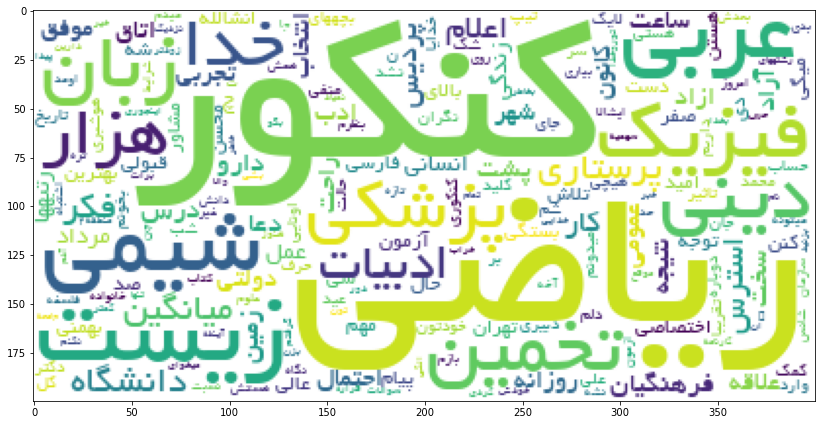

In [71]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)